In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt


## Get Dataset

In [27]:
# img_height = 256
# img_width = 256

# data_dir = "dataset"

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   seed=420,
#   image_size=(img_height, img_width),
#   batch_size=None)

In [28]:
import tensorflow as tf
import numpy as np

def dataset_to_numpy(dataset):
    images, labels = [], []
    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label.numpy())
    return np.stack(images), np.array(labels)

# Assuming you have a TensorFlow dataset
data_dir = "dataset"
dataset = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	labels='inferred',
	image_size=(150, 150),
	batch_size=None
)

# Split dataset into train and validation sets
train_size = int(0.8 * len(dataset))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Convert to NumPy arrays
x_train, y_train = dataset_to_numpy(train_dataset)
x_val, y_val = dataset_to_numpy(val_dataset)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


Found 1108 files belonging to 4 classes.
x_train shape: (886, 150, 150, 3), y_train shape: (886,)
x_val shape: (222, 150, 150, 3), y_val shape: (222,)


In [29]:
class_names = dataset.class_names

In [30]:
x_train.shape

(886, 150, 150, 3)

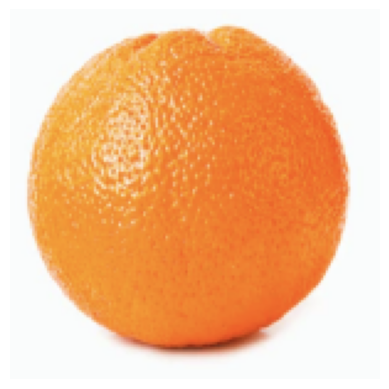

In [31]:
plt.imshow(x_train[0].astype(np.uint8))
plt.axis("off")
plt.show()

### Standardize the data

In [32]:
standardize_func = np.vectorize(lambda x: x/255.0)

normalized_train = standardize_func(x_train)

#Notice the pixel values are now in `[0,1]`.
print(np.min(normalized_train[0]), np.max(normalized_train[0]))

0.07920361 1.0


In [33]:
normalized_train.shape

(886, 150, 150, 3)

In [34]:
def flatten_numpy(dataset):
    result = np.array([data.flatten() for data in dataset])
    return result

# Assuming normalized_train has a shape of (886, 150, 150, 3)
X_train = flatten_numpy(normalized_train)


print(X_train.shape)  # Should output: (886, 67500)

(886, 67500)


## Train model

In [35]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.Input(shape=(67500,)),
  Dense(32, activation='relu', name="L1"),
  Dense(32, activation='relu', name="L2"),
  Dense(32, activation='relu', name="L3"),
  Dense(128, activation='relu', name="L4"),
  Dense(num_classes, activation="linear", name="L5")
], name="fruit_recognizer")

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [36]:
model.fit(
  X_train,y_train,
  epochs=40
)

Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3167 - loss: 1.7655
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4726 - loss: 1.2238
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7118 - loss: 0.7885
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7451 - loss: 0.7134
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6639 - loss: 0.8818
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7729 - loss: 0.6560
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7664 - loss: 0.5971
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7560 - loss: 0.6538
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7419 - loss: 0.6543
Epoch 10/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7751 - loss: 0.5733
Epoch 11/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7856 - loss: 0.5502
Epoch 12/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy:

In [37]:
#softmax prediction
prediction_p = tf.nn.softmax(model.predict(X_train[0].reshape(1,67500)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [38]:
np.argmax(prediction_p)

np.int64(3)

In [39]:
y_hats = model.predict(X_train)
y_hats = [np.argmax(tf.nn.softmax(y_hat)) for y_hat in y_hats]
sum(y_hats == y_train) / len(y_hats)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


np.float64(0.9345372460496614)

In [40]:
standardize_func = np.vectorize(lambda x: x/255.0)
normalized_val = standardize_func(x_val)

def flatten_numpy(dataset):
    result = np.array([data.flatten() for data in dataset])
    return result

# Assuming normalized_train has a shape of (886, 150, 150, 3)
X_val = flatten_numpy(normalized_val)



y_hats = model.predict(X_val)
y_hats = [np.argmax(tf.nn.softmax(y_hat)) for y_hat in y_hats]
sum(y_hats == y_val) / len(y_hats)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


np.float64(0.8873873873873874)

## Create Pipline to process data

In [41]:
# x need to be in numpy array
def format_input(x):
    return (x/255.0).flatten()



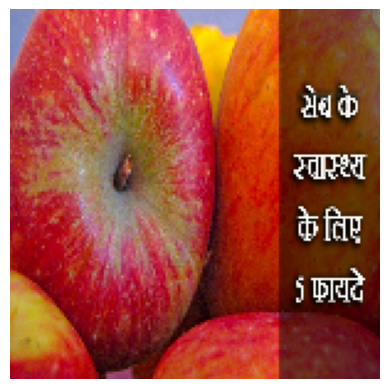

In [42]:
plt.imshow(x_val[0].astype(np.uint8))
plt.axis("off")
plt.show()

In [43]:
(x_val[0]/255).flatten()

array([0.50007844, 0.54321563, 0.7236078 , ..., 0.36108506, 0.07813063,
       0.13315022], dtype=float32)

In [44]:
prediction = np.argmax(model.predict(np.array((x_val[0] / 255).flatten()).reshape(1, -1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [45]:
class_names[prediction]

'mango'

In [46]:
model.save("fruit_recognizer.keras")

In [47]:
model2 = tf.keras.models.load_model("fruit_recognizer.keras")

prediction = np.argmax(model2.predict(np.array((x_val[0] / 255).flatten()).reshape(1, -1)))
class_names[prediction]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


'mango'

In [50]:
class_names[y_val[0]]

'apples'